In [7]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sternberg/2021/Sternberg_cleaned.csv'

data = pd.read_csv(file)

data.head()

,setSize,present,id,rt
0,1,n,1,407.000000
1,1,n,2,848.500000
2,1,n,3,549.333333
3,1,n,4,982.333333
4,1,n,6,568.000000


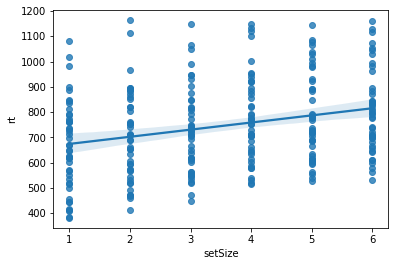

In [8]:
import seaborn as sns
ax = sns.regplot(x = 'setSize', y = 'rt', data = data)

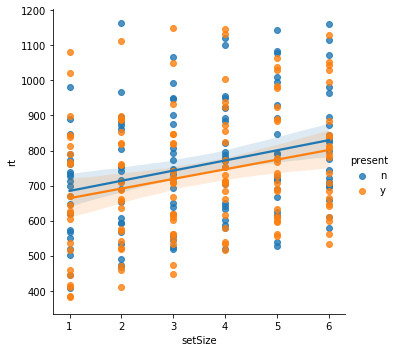

In [9]:
ax = sns.lmplot(
    data = data,
    x = "setSize", y = "rt",
    hue = "present"
)

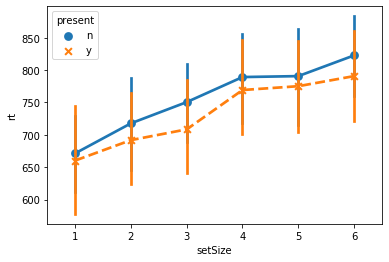

In [10]:
ax = sns.pointplot(x="setSize", y="rt", hue="present", data=data, markers=["o","x"], linestyles=["-","--"])

In [11]:
data['setSize'].corr(data['rt'])

0.27273669506624015

In [12]:
import scipy
scipy.stats.pearsonr(data['setSize'], data['rt'])

(0.2727366950662401, 6.926202819974687e-06)

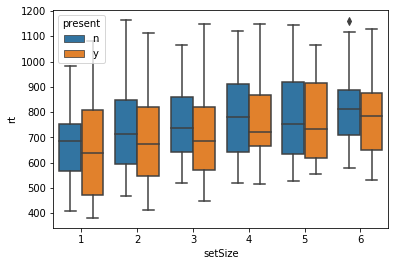

In [13]:
ax = sns.boxplot(x = 'setSize', y = 'rt', hue = "present", data = data)